In [1]:
%pylab inline

import pandas as pd
import re
import scipy.stats as stats
import scipy.cluster.hierarchy as clust
import glob as glob
rcParams['pdf.fonttype']=42
rcParams['font.family']='arial'
rcParams['font.size']=14

Populating the interactive namespace from numpy and matplotlib


## Get the expression data 

In [4]:
exp=pd.read_table('data_ccle_RNAseq_DREAMv2_FIXED.csv', sep=",", index_col=0)
exp.shape

(19144, 515)

In [5]:
exp.head()

,A101D,A172,A204,A2058,A253,A2780,A375,A3KAW,A498,A4FUK,...,WM2664,WM793,WM88,WM983B,WSUDLCL2,YD38,YD8,YKG1,ZR751,ZR7530
TSPAN6,3.467279,0.189034,2.655352,4.015248,0.124328,6.524816,4.032101,0.056584,4.391630,0.150560,...,4.524189,3.147307,3.845992,3.606442,0.839960,4.424250,5.567424,5.914086,3.158660,4.130931
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,1.790772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,7.092229,6.642268,6.542568,6.583760,6.697663,6.871104,7.577957,5.685940,6.402415,6.106223,...,6.158862,6.655352,7.400623,7.386639,5.376082,6.567424,6.868637,6.749668,7.092229,5.817879
SCYL3,2.204767,2.330558,3.282440,2.615887,1.411426,2.803227,2.625270,3.014355,2.000000,2.613532,...,2.568032,2.722466,3.560715,2.510962,2.687061,2.353323,2.599318,2.809414,4.063503,3.891419
C1orf112,4.125982,4.726831,3.740928,4.587365,3.377124,4.480265,4.822730,2.134221,3.226509,3.368768,...,3.735522,4.690417,4.416164,3.891419,4.440288,4.536675,3.379898,4.175525,4.101818,3.651913


In [7]:
expressionmean1 = exp.mean(axis=1)
expressionmax1 = exp.max(axis=1)
expressionmin1 = exp.min(axis=1)
expressionstd1 = exp.std(axis=1)
exp['mean'] = expressionmean1
exp['min'] = expressionmin1
exp['max'] = expressionmax1
exp['STD'] = expressionstd1

exp.head()

,A101D,A172,A204,A2058,A253,A2780,A375,A3KAW,A498,A4FUK,...,WSUDLCL2,YD38,YD8,YKG1,ZR751,ZR7530,mean,min,max,STD
TSPAN6,3.467279,0.189034,2.655352,4.015248,0.124328,6.524816,4.032101,0.056584,4.391630,0.150560,...,0.839960,4.424250,5.567424,5.914086,3.158660,4.130931,4.004419,0.000000,6.835040,1.624462
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,1.790772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043640,0.000000,5.120186,0.283812
DPM1,7.092229,6.642268,6.542568,6.583760,6.697663,6.871104,7.577957,5.685940,6.402415,6.106223,...,5.376082,6.567424,6.868637,6.749668,7.092229,5.817879,6.411141,4.502712,9.085791,0.596403
SCYL3,2.204767,2.330558,3.282440,2.615887,1.411426,2.803227,2.625270,3.014355,2.000000,2.613532,...,2.687061,2.353323,2.599318,2.809414,4.063503,3.891419,2.370382,0.823749,4.760753,0.530745
C1orf112,4.125982,4.726831,3.740928,4.587365,3.377124,4.480265,4.822730,2.134221,3.226509,3.368768,...,4.440288,4.536675,3.379898,4.175525,4.101818,3.651913,3.812089,1.604071,5.634593,0.655336


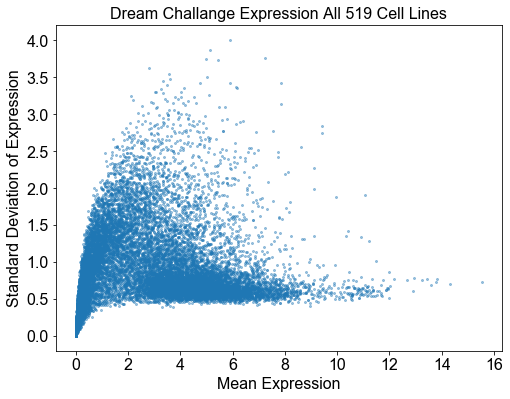

In [48]:
figsize(8,6)
scatter(exp['mean'], exp['STD'], s=4, alpha=0.4)
title('Dream Challange Expression All 519 Cell Lines', size=16)
xlabel('Mean Expression', size=16)
ylabel('Standard Deviation of Expression', size=16)
xticks(size=16)
yticks(size=16)

savefig("Dream_exp_std_mean_exp_519_celllines.png", format='png', dpi=350, bbox_inches='tight')


## let's model these expression profiles with GMM 

In [11]:
sub_exp=exp[['mean', 'STD']]

In [12]:
sub_exp_no_index=sub_exp.reset_index(inplace=True)
sub_exp_no_index=sub_exp.drop(['index'], axis=1)

In [13]:
sub_exp_no_index.head()

,mean,STD
0,4.004419,1.624462
1,0.043640,0.283812
2,6.411141,0.596403
3,2.370382,0.530745
4,3.812089,0.655336


Text(0, 0.5, 'STD Expression')

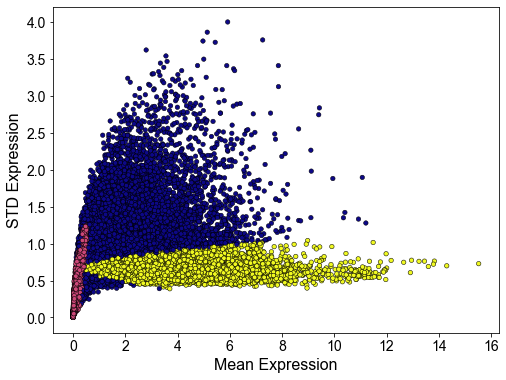

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(sub_exp_no_index)
labels = gmm.predict(sub_exp_no_index)
plt.scatter(sub_exp_no_index.iloc[:,0].values, sub_exp_no_index.iloc[:, 1], c=labels, s=20, cmap='plasma', edgecolor='k',linewidth=0.5)
xlabel('Mean Expression', size=16)
xticks(size=14)
yticks(size=14)
ylabel('STD Expression', size=16)

In [15]:
GMM_3groups_exp=sub_exp.copy()
GMM_3groups_exp['group']=labels

In [16]:
GMM_3groups_exp.head()

,index,mean,STD,group
0,TSPAN6,4.004419,1.624462,0
1,TNMD,0.043640,0.283812,1
2,DPM1,6.411141,0.596403,2
3,SCYL3,2.370382,0.530745,2
4,C1orf112,3.812089,0.655336,2


In [17]:
GMM_3groups_exp.shape

(19144, 4)

In [18]:
GMM_3groups_exp.to_csv("GMM_assigned_3_groups_expression_dream.txt", sep="\t")

In [25]:
GMM_3groups_exp[GMM_3groups_exp['group']==1].head(10)

,index,mean,STD,group
1,TNMD,0.043640,0.283812,1
5,FGR,0.325822,1.026459,1
25,WNT16,0.323001,0.735721,1
60,SLC22A16,0.210638,0.799077,1
62,ABCB5,0.285664,0.997714,1
63,ARX,0.213590,0.575865,1
67,SLC4A1,0.053659,0.199642,1
68,CALCR,0.142818,0.410557,1
79,MEOX1,0.394248,1.033971,1
80,THSD7A,0.512360,0.888529,1


## Never expressed are in group 1

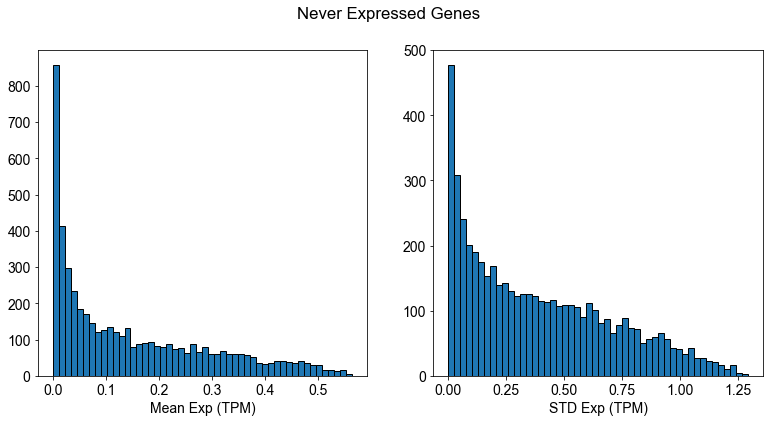

In [34]:
figsize(13,6)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.suptitle('Never Expressed Genes')

ax1.hist(GMM_3groups_exp[GMM_3groups_exp['group']==1]['mean'], bins=50, edgecolor='k')
ax1.set_xlabel('Mean Exp (TPM)')
ax2.hist(GMM_3groups_exp[GMM_3groups_exp['group']==1]['STD'], bins=50, edgecolor='k')
ax2.set_xlabel('STD Exp (TPM)')
show()

## let's get these never expressed genes

In [27]:
never_GMM=GMM_3groups_exp[GMM_3groups_exp['group']==1]['index'].values

In [28]:
len(never_GMM)

5044

In [29]:
with open("5044_never_exp_GMM_dream_comp.txt", 'w') as f:
    for s in never_GMM:
        f.write(str(s) + '\n')

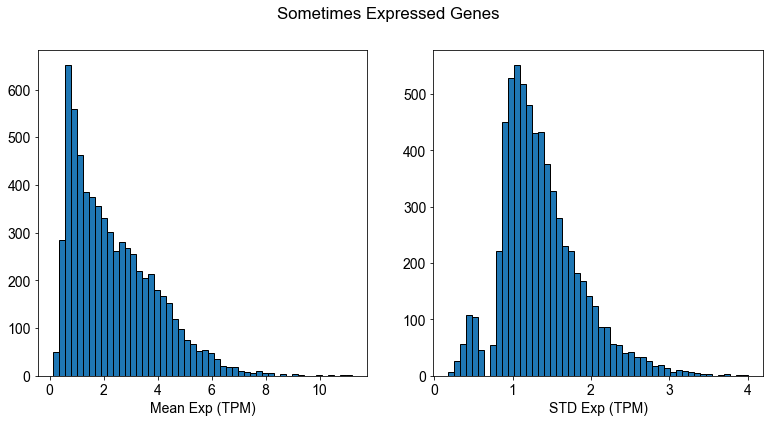

In [35]:
figsize(13,6)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.suptitle('Sometimes Expressed Genes')

ax1.hist(GMM_3groups_exp[GMM_3groups_exp['group']==0]['mean'], bins=50, edgecolor='k')
ax1.set_xlabel('Mean Exp (TPM)')
ax2.hist(GMM_3groups_exp[GMM_3groups_exp['group']==0]['STD'], bins=50, edgecolor='k')
ax2.set_xlabel('STD Exp (TPM)')
show()

## Sometimes expressed are group 0


In [36]:
sometimes_expressed_GMM=GMM_3groups_exp[GMM_3groups_exp['group']==0]['index'].values

In [37]:
len(sometimes_expressed_GMM)

6625

In [39]:
with open("6625_sometimes_exp_GMM_dream_comp.txt", 'w') as f:
    for s in sometimes_expressed_GMM:
        f.write(str(s) + '\n')

## Always expressed are group 2

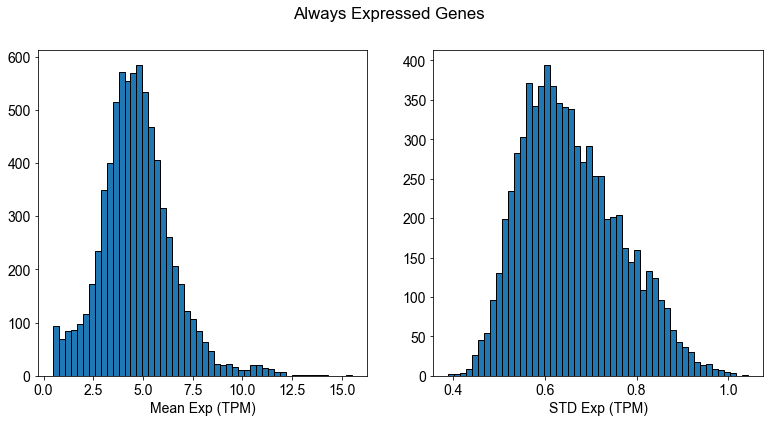

In [40]:
figsize(13,6)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.suptitle('Always Expressed Genes')

ax1.hist(GMM_3groups_exp[GMM_3groups_exp['group']==2]['mean'], bins=50, edgecolor='k')
ax1.set_xlabel('Mean Exp (TPM)')
ax2.hist(GMM_3groups_exp[GMM_3groups_exp['group']==2]['STD'], bins=50, edgecolor='k')
ax2.set_xlabel('STD Exp (TPM)')
show()

In [41]:
always_expressed_GMM=GMM_3groups_exp[GMM_3groups_exp['group']==2]['index'].values

In [42]:
len(always_expressed_GMM)

7475

In [43]:
with open("7475_always_exp_GMM_dream_comp.txt", 'w') as f:
    for s in always_expressed_GMM:
        f.write(str(s) + '\n')

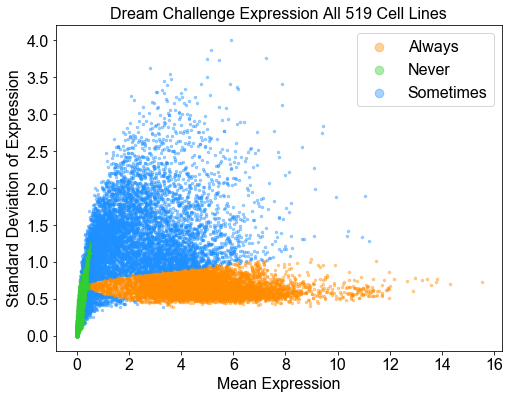

In [47]:
figsize(8,6)

scatter(exp.loc[always_expressed_GMM]['mean'], exp.loc[always_expressed_GMM]['STD'], s=6, alpha=0.4 ,label='Always', color='darkorange')
scatter(exp.loc[never_GMM]['mean'], exp.loc[never_GMM]['STD'], s=6, alpha=0.4, label='Never', color='limegreen')
scatter(exp.loc[sometimes_expressed_GMM]['mean'], exp.loc[sometimes_expressed_GMM]['STD'], s=6, alpha=0.4, label='Sometimes', color='dodgerblue')
title('Dream Challenge Expression All 519 Cell Lines', size=16)
xlabel('Mean Expression', size=16)
ylabel('Standard Deviation of Expression', size=16)
xticks(size=16)
yticks(size=16)
legend(fontsize=16, markerscale=3.5)
savefig("dream_never_sometimes_always_exp_based_on_GMM.png", format="png", dpi=350, bbox_inches='tight')
savefig("dream_never_sometimes_always_exp_based_on_GMM.pdf", format="pdf", bbox_inches='tight')


show()